In [1]:
import pymongo
from pymongo import MongoClient
import datetime
import pandas
from pandas import DataFrame,Series
import json
from pprint import pprint # to pretty print the cursor result.
%matplotlib inline
import plotly

In [28]:
client = MongoClient('localhost', 27017)

db = client.test_database

ellis_collection = db.Ellis


In [21]:
#dframe = DataFrame.read_csv(,sep=";",usecols=[1])
dframe = pandas.read_csv("../Forecasting-ANN/Data/Ellis.csv", sep=';',index_col=False, delimiter=";", dtype=None, engine='python')
dframe.head()

,Timestamp,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb
0,2016-08-31T20:47:23.230Z,2.04,16.8,65.800000,3.6,5967.800000,4997
1,2016-08-31T20:47:53.252Z,1.82,12.7,65.266667,0.9,5722.100000,5014
2,2016-08-31T20:48:23.233Z,1.63,14.3,65.200000,0.6,5487.333333,5013
3,2016-08-31T20:48:53.256Z,1.63,17.5,65.233333,0.6,5545.433333,5014
4,2016-08-31T20:49:23.235Z,1.37,18.0,65.866667,0.5,5597.666667,5013


In [22]:
dframe.T.to_json()[0:100]

'{"0":{"Timestamp":"2016-08-31T20:47:23.230Z","load_avg_1_min":2.04,"cpu_wait_perc":16.8,"net_out_pac'

In [23]:
records = json.loads(dframe.T.to_json()).values()
records

[{u'Timestamp': u'2016-09-04T01:41:18.479Z',
  u'cpu_system_perc': 0.6,
  u'cpu_wait_perc': 6.9,
  u'load_avg_1_min': 1.24,
  u'mem_free_mb': 4414.0,
  u'net_in_bytes_sec': 5080.1666666667,
  u'net_out_packets_sec': 59.3666666667},
 {u'Timestamp': u'2016-09-04T01:41:48.445Z',
  u'cpu_system_perc': 0.5,
  u'cpu_wait_perc': 6.5,
  u'load_avg_1_min': 1.07,
  u'mem_free_mb': 4414.0,
  u'net_in_bytes_sec': 5321.3666666667,
  u'net_out_packets_sec': 60.8},
 {u'Timestamp': u'2016-09-04T01:38:18.441Z',
  u'cpu_system_perc': 0.6,
  u'cpu_wait_perc': 6.6,
  u'load_avg_1_min': 0.51,
  u'mem_free_mb': 4414.0,
  u'net_in_bytes_sec': 5108.9333333333,
  u'net_out_packets_sec': 59.8333333333},
 {u'Timestamp': u'2016-09-04T01:38:48.467Z',
  u'cpu_system_perc': 0.6,
  u'cpu_wait_perc': 7.5,
  u'load_avg_1_min': 1.15,
  u'mem_free_mb': 4414.0,
  u'net_in_bytes_sec': 5383.5666666667,
  u'net_out_packets_sec': 61.1666666667},
 {u'Timestamp': u'2016-09-04T01:37:18.438Z',
  u'cpu_system_perc': 0.6,
  u'cpu_w

In [29]:
result = db.ellis_collection.insert_many(dframe.to_dict('records'))

In [30]:
result.acknowledged
result.inserted_ids

[ObjectId('57e5b75f3fb7f8417c94f399'),
 ObjectId('57e5b75f3fb7f8417c94f39a'),
 ObjectId('57e5b75f3fb7f8417c94f39b'),
 ObjectId('57e5b75f3fb7f8417c94f39c'),
 ObjectId('57e5b75f3fb7f8417c94f39d'),
 ObjectId('57e5b75f3fb7f8417c94f39e'),
 ObjectId('57e5b75f3fb7f8417c94f39f'),
 ObjectId('57e5b75f3fb7f8417c94f3a0'),
 ObjectId('57e5b75f3fb7f8417c94f3a1'),
 ObjectId('57e5b75f3fb7f8417c94f3a2'),
 ObjectId('57e5b75f3fb7f8417c94f3a3'),
 ObjectId('57e5b75f3fb7f8417c94f3a4'),
 ObjectId('57e5b75f3fb7f8417c94f3a5'),
 ObjectId('57e5b75f3fb7f8417c94f3a6'),
 ObjectId('57e5b75f3fb7f8417c94f3a7'),
 ObjectId('57e5b75f3fb7f8417c94f3a8'),
 ObjectId('57e5b75f3fb7f8417c94f3a9'),
 ObjectId('57e5b75f3fb7f8417c94f3aa'),
 ObjectId('57e5b75f3fb7f8417c94f3ab'),
 ObjectId('57e5b75f3fb7f8417c94f3ac'),
 ObjectId('57e5b75f3fb7f8417c94f3ad'),
 ObjectId('57e5b75f3fb7f8417c94f3ae'),
 ObjectId('57e5b75f3fb7f8417c94f3af'),
 ObjectId('57e5b75f3fb7f8417c94f3b0'),
 ObjectId('57e5b75f3fb7f8417c94f3b1'),
 ObjectId('57e5b75f3fb7f8

In [31]:
ellis_collection.full_name

u'test_database.Ellis'

In [32]:
db.collection_names(include_system_collections=False)

[u'posts',
 u'ellis_collection',
 u'macollection',
 u'newCollection',
 u'collection']

In [33]:
for o in db.ellis_collection.find():
    print o;

{u'cpu_wait_perc': 16.8, u'Timestamp': u'2016-08-31T20:47:23.230Z', u'cpu_system_perc': 3.6, u'mem_free_mb': 4997.0, u'_id': ObjectId('57e5b75f3fb7f8417c94f399'), u'net_in_bytes_sec': 5967.8, u'load_avg_1_min': 2.04, u'net_out_packets_sec': 65.8}
{u'cpu_wait_perc': 12.7, u'Timestamp': u'2016-08-31T20:47:53.252Z', u'cpu_system_perc': 0.9, u'mem_free_mb': 5014.0, u'_id': ObjectId('57e5b75f3fb7f8417c94f39a'), u'net_in_bytes_sec': 5722.1, u'load_avg_1_min': 1.82, u'net_out_packets_sec': 65.26666666666667}
{u'cpu_wait_perc': 14.3, u'Timestamp': u'2016-08-31T20:48:23.233Z', u'cpu_system_perc': 0.6, u'mem_free_mb': 5013.0, u'_id': ObjectId('57e5b75f3fb7f8417c94f39b'), u'net_in_bytes_sec': 5487.333333333333, u'load_avg_1_min': 1.63, u'net_out_packets_sec': 65.2}
{u'cpu_wait_perc': 17.5, u'Timestamp': u'2016-08-31T20:48:53.256Z', u'cpu_system_perc': 0.6, u'mem_free_mb': 5014.0, u'_id': ObjectId('57e5b75f3fb7f8417c94f39c'), u'net_in_bytes_sec': 5545.4333333333325, u'load_avg_1_min': 1.63, u'net_

In [34]:
df = DataFrame(list(db.ellis_collection.find()))

In [35]:
df

,Timestamp,_id,cpu_system_perc,cpu_wait_perc,load_avg_1_min,mem_free_mb,net_in_bytes_sec,net_out_packets_sec
0,2016-08-31T20:47:23.230Z,57e5b75f3fb7f8417c94f399,3.6,16.8,2.04,4997,5967.800000,65.800000
1,2016-08-31T20:47:53.252Z,57e5b75f3fb7f8417c94f39a,0.9,12.7,1.82,5014,5722.100000,65.266667
2,2016-08-31T20:48:23.233Z,57e5b75f3fb7f8417c94f39b,0.6,14.3,1.63,5013,5487.333333,65.200000
3,2016-08-31T20:48:53.256Z,57e5b75f3fb7f8417c94f39c,0.6,17.5,1.63,5014,5545.433333,65.233333
4,2016-08-31T20:49:23.235Z,57e5b75f3fb7f8417c94f39d,0.5,18.0,1.37,5013,5597.666667,65.866667
5,2016-08-31T20:49:53.248Z,57e5b75f3fb7f8417c94f39e,0.6,17.9,1.62,5013,5576.833333,64.400000
6,2016-08-31T20:50:23.237Z,57e5b75f3fb7f8417c94f39f,0.5,17.4,1.49,5013,5595.966667,66.800000
7,2016-08-31T20:50:53.255Z,57e5b75f3fb7f8417c94f3a0,0.5,17.8,1.17,5013,5437.466667,62.866667
8,2016-08-31T20:51:23.239Z,57e5b75f3fb7f8417c94f3a1,0.5,14.6,1.57,5014,5498.233333,64.300000
9,2016-08-31T20:51:53.263Z,57e5b75f3fb7f8417c94f3a2,0.5,11.4,1.24,5014,5553.533333,64.133333


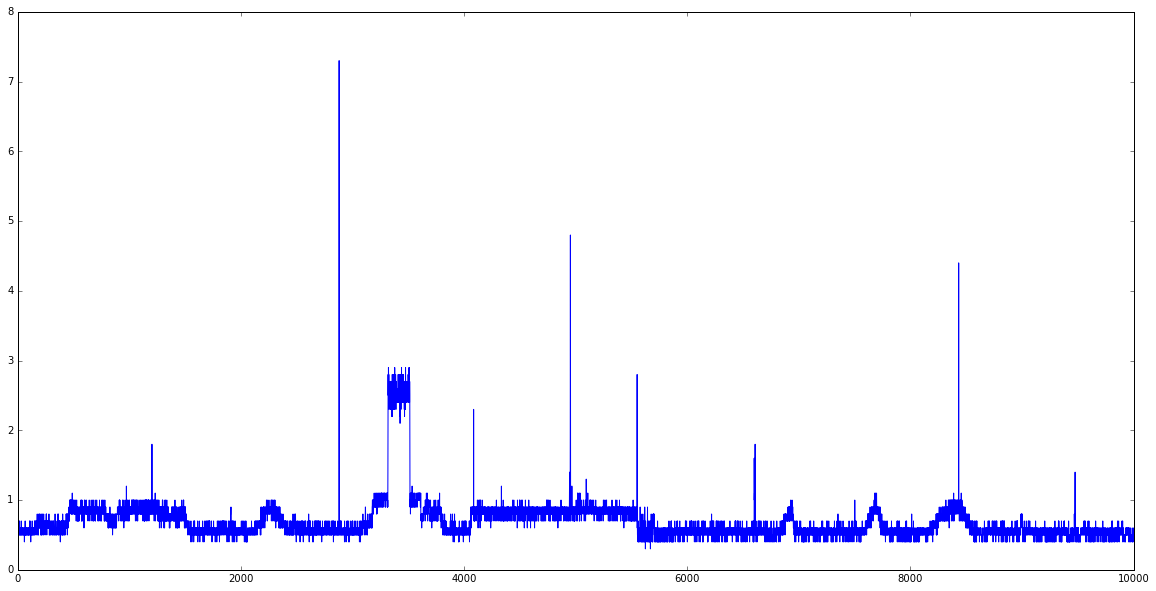

In [36]:
df['cpu_system_perc'].plot(figsize=(20,10))